# 1.
1. Simple Linear Regression examines the relationship between one predictor variable and the outcome variable, whereas Multiple Linear Regression examines the relationship between multiple predictor variables and the outcome variable. Multiple Linear Regressiom 
2. Simple Linear Regression using a continuous variable as a predictor has the form $Y_i=\beta_0+\beta_1x_i+\varepsilon_i$, where the predictor variable $x_i$ can be anything within the range of the data, and $\beta_1$ represents the slope or the change in outcome variable per unit change in the predictor variable. Compared to using an indicator variable which takes the form $Y_i=\beta_0+\beta_11_{[x_i=\text{"B"}]}(x_i)+\varepsilon_i$, where the predictor variable is $1$ whenever $x_i$ is category $\text{B}$ and otherwise $0$, hence $\beta_1$ represents the average difference in the outcome varible in group $\text{B}$ realtive to the baseline group (in this case group $\text{A}$), hence this model produces 2 points.
3. A Multiple Linear Regression with a indicator variable and a continuous variable has the form of $Y_i=\beta_0+\beta_11_{[x_i=\text{"B"}]}(x_i)+\beta_3z_i+\varepsilon_i$, which models continuous data that are grouped by the indicator variable. Compared to Simple Linear Regression with a continuous variable which only produces one line, this model produces 2 parallel lines with different intercepts, as the slope is always $\beta_3$ regardless of what $x_i$ is, but when $x_i$ is $\text{B}$ the intercept is $\beta_0+beta_1$ and only $\beta_0$ when $x_i$ isn't $\text{B}$.
4. Multiple Linear Regression with an interaction between a continuous and indicator variable has the form $Y_i=\beta_0+\beta_11_{[x_i=\text{"B"}]}(x_i)+(\beta_4+\beta_51_{[x_i=\text{"B"}]}(x_i))\times z_i+\varepsilon_i$, this also produces 2 lines but this they are not parallel, as the slope is $\beta_4+\beta_5$ when $x_i$ is $\text{B}$ and only $\beta_4$ when $x_i$ isn't.
5. This Multiple Linear Regression model in general has the form $Y_i=\beta_1+\beta_21_{[x_i=\text{"Group }2"]}(x_i)+\beta_31_{[x_i=\text{"Group }3"]}(x_i)+\dots+\beta_n1_{[x_i=\text{"Group }n"]}(x_i)+\varepsilon_i$ for indicator variables with $n$ categories. Each predictor variable is $1$ if $x_i$ matches the specified category otherwise $0$, and the corresponding $\beta$s represents the average difference of the outcome variable in each group relative to the baseline group. Therefore this model produces $n$ points.

# 2.
1. If the effectiveness of TV ads is independent on the amount spent on online advertisement, then the sports equipment sale (outcome variable) can be modeled by $Y_i=\beta_0+\beta_1x_i+\beta_2z_i+\varepsilon_i$. If they are dependent however, then the model would have an extra interaction term $\beta_3x_i\times z_i$, hence the model has the form $Y_i=\beta_0+\beta_1x_i+\beta_2z_i+\beta_3z_i\times x_i+\varepsilon_i$. The only difference between these 2 models is the interaction term, which represents the change in the effectiveness of TV ads per unit change in the amount spent on online advertisement.
2. If the amount spent on online advertising is a binary categorical variable, and effectiveness of TV ads is independent on the online advertisement budget, the model would become $Y_i=\beta_0+\beta_1x_i+\beta_21_{[z_i=\text{"High"}]}(z_i)+\varepsilon_i$, where the indicator $1_{[z_i=\text{"High"}]}(z_i)$ is $1$ when online advertisement budget it $\text{high}$ and otherwise $0$. This model produces 2 parallel lines as the online advertisement budget only affects the intercept where the change in sports equipment sale per unit change in TV ads is always $\beta_1$. If they are dependent, then the model would have an extra interaction term $\beta_31_{[z_i=\text{"High"}]}(z_i)\times x_i$, hence the model has the form $Y_i=\beta_0+\beta_21_{[z_i=\text{"High"}]}(z_i)+(\beta_1+\beta_31_{[z_i=\text{"High"}]}(z_i))\times x_i+\varepsilon_i$, which produces 2 line that are not parallel as $\beta_3$ represents the change in the rate of change in sport equipment sale per unit change in TV ads if the online advertisement budget is high.

# 3.
1. 

In [4]:
import pandas as pd
import statsmodels.formula.api as smf

data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv", low_memory=False)

data1 = data[['LONELY_direct', 'CONNECTION_social_num_friends_p7d', 'CONNECTION_social_num_close_friends']].dropna()
data1 = data1[data1['LONELY_direct'] != 'Presented but no response']
data1['All_The_Time'] = (data1['LONELY_direct'] == 'All of the time (e.g. 5-7 days)]').astype(int)

fitted_model1 = smf.logit('All_The_Time ~ CONNECTION_social_num_friends_p7d + CONNECTION_social_num_close_friends', data1).fit()
fitted_model1.summary()

Optimization terminated successfully.
         Current function value: 0.308533
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           All_The_Time   No. Observations:                 5231
Model:                          Logit   Df Residuals:                     5228
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                 0.03957
Time:                        00:18:16   Log-Likelihood:                -1613.9
converged:                       True   LL-Null:                       -1680.4
Covariance Type:            nonrobust   LLR p-value:                 1.331e-29
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.5126      0.076    -19.775      0.000      -1.663      -1.363
CONNECTION_social_num_friends_p7d      -0.0698      0.019     -3.660      0.000      -0.107      -0.032
CONNECTION_social_num_close_friends    -0.1420      0.021     -6.630      0.000      -0.184      -0.100
=======================================================================================================
"""

2. 

In [6]:
data2 = data[['CONNECTION_social_num_close_friends', 'COVID_vaccinated', 'CONNECTION_preference_time_friends']].dropna()
data2 = data2[data2['COVID_vaccinated'] != 'Presented but no response']
data2['vaccinated'] = data2['COVID_vaccinated'] != 'No'

fitted_model2 = smf.ols('CONNECTION_social_num_close_friends ~ vaccinated * CONNECTION_preference_time_friends', data2).fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     CONNECTION_social_num_close_friends   R-squared:                       0.027
Model:                                             OLS   Adj. R-squared:                  0.026
Method:                                  Least Squares   F-statistic:                     26.91
Date:                                 Sun, 10 Nov 2024   Prob (F-statistic):           3.64e-17
Time:                                         00:40:05   Log-Likelihood:                -9015.3
No. Observations:                                 2958   AIC:                         1.804e+04
Df Residuals:                                     2954   BIC:                         1.806e+04
Df Model:                                            3                                         
Covariance Type:                             nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 3.0700      0.511      6.008      0.000       2.068       4.072
vaccinated[T.True]                                        1.3017      0.523      2.489      0.013       0.276       2.327
CONNECTION_preference_time_friends                        0.1162      0.050      2.341      0.019       0.019       0.214
vaccinated[T.True]:CONNECTION_preference_time_friends    -0.0678      0.050     -1.356      0.175      -0.166       0.030
==============================================================================
Omnibus:                     4754.078   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6858147.426
Skew:                           9.933   Prob(JB):                         0.00
Kurtosis:                     238.052   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. For part 1, the model has the form $\hat{y_i}=\beta_0+\beta_1x_i+\beta_2z_i$ where:

    | Variable | Meaning / Value |
    |:-:|-|
    |$\hat{y_i}$|Do you feel lonely all the time (1 for True and 0 for False)?|
    |$\beta_0$|$-1.5126$|
    |$x_i$|In the PAST SEVEN DAYS, how many people from each of the following groups did you spend at least 5 minutes socializing with? - Friends|
    |$\beta_1$|$-0.0698$|
    |$z_i$|How many close friends do you have?|
    |$\beta_2$|$-0.1420$|
    
    Since $\beta_1$ and $\beta_2$ are negative, which means that more close friends and more time spent socializing with friends implies that they are less likely to feel lonely all the time. Since both predictor variables are continous, whether they feel lonely all the time can be predicted by plugging the values into the model.<br><br>
For part 2, the model has the form $\hat{y_i}=\beta_0+\beta_1\times1_{[x_i=\text{"Yes"}]}(x_i)+(\beta_2+\beta_3\times1_{[x_i=\text{"Yes"}]}(x_i))\times z_i$, where:

    | Variable | Meaning / Value |
    |:-:|-|
    |$\hat{y_i}$|How many close friends do you have?|
    |$\beta_0$|$3.0700$|
    |$x_i$|Did you receive at least one covid vaccine?|
    |$\beta_1$|$1.3017$|
    |$z_i$|Ideally, how many hours per week would you like to spend socializing with each of the following groups? - Friends|
    |$\beta_2$|$0.1162$|
    |$\beta_3$|$-0.0678$|

    The indicator variable $1_{[x_i=\text{"Yes"}]}(x_i)$ evaluates to $1$ if $x_i$ is $\text{"Yes"}$ and otherwise $0$. $\beta_1$ is postive means that being vaccinated means more close friends for $z_i=0$. $\beta_2$ is postive means that an increase in $z_i$ leads to an increase in $\hat{y_i}$. $\beta_3$ is negative means that being vaccinated decreases the change in $\hat{y_i}$ per unit change in $z_i$. The number of close friends can be predicted by evaluating the indicator variable and then plug in the value of $z_i$ since it is continuous.
4. For part 1, the p-value is 0 for all the coefficients of the predictor variable, which indicates very strong evidence against the null hypothesis, hence the model fits the data. For part 2, the p-value showed moderate evidence against the null hypothesis for $\beta_1$ and $\beta_2$. But for $\beta_3$ it showed no evidence against the null hypothesis, hence this model may not be a good fit for the data, in particular the interaction term $\beta_3\times1_{[x_i=\text{"Yes"}]}(x_i)\times z_i$.
5. 

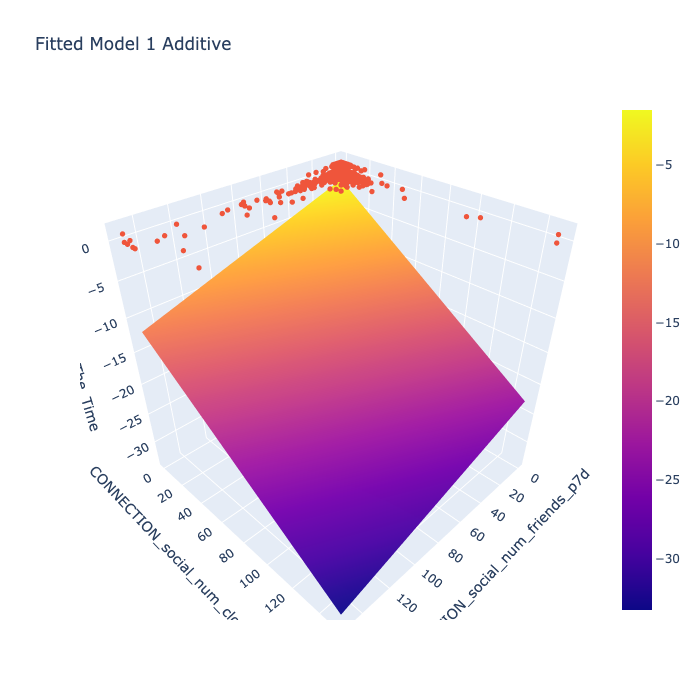

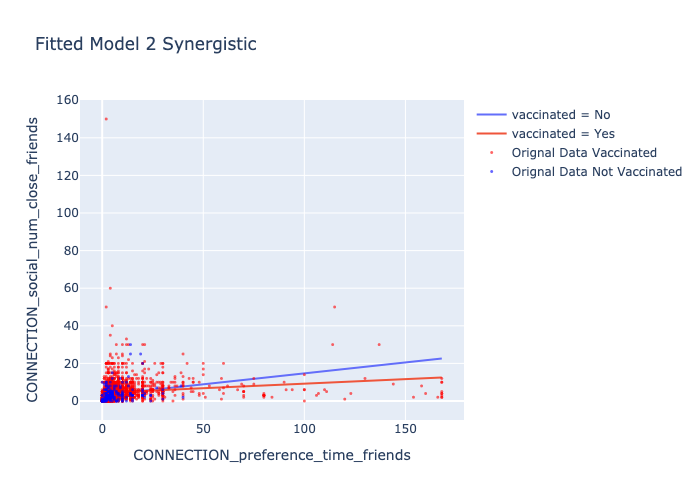

In [22]:
import plotly.graph_objects as go
import numpy as np

xi1_range = np.array([[data1['CONNECTION_social_num_friends_p7d'].min(), data1['CONNECTION_social_num_friends_p7d'].min()],
                       [data1['CONNECTION_social_num_friends_p7d'].max(), data1['CONNECTION_social_num_friends_p7d'].max()]])
zi1_range = np.array([[data1['CONNECTION_social_num_close_friends'].min(), data1['CONNECTION_social_num_close_friends'].max()],
                       [data1['CONNECTION_social_num_close_friends'].min(), data1['CONNECTION_social_num_close_friends'].max()]])
y_hat_i_range = fitted_model1.params['Intercept'] + fitted_model1.params['CONNECTION_social_num_friends_p7d'] * xi1_range + fitted_model1.params['CONNECTION_social_num_close_friends'] * zi1_range

fig1 = go.Figure()
fig1.add_trace(go.Surface(x=xi1_range, y=zi1_range, z=y_hat_i_range))
fig1.add_trace(
    go.Scatter3d(
        x=data1['CONNECTION_social_num_friends_p7d'],
        y=data1['CONNECTION_social_num_close_friends'], 
        z=data1['All_The_Time'], mode='markers',
        marker=dict(size=3)
    )
)
fig1.update_layout(
    title="Fitted Model 1 Additive",
    width=700,
    height=700,
    scene=dict(
        xaxis_title="CONNECTION_social_num_friends_p7d",
        yaxis_title="CONNECTION_social_num_close_friends",
        zaxis_title="All_The_Time"
    )
)
fig1.show(renderer='png')

zi2_range = np.array([data2['CONNECTION_preference_time_friends'].min(), data2['CONNECTION_preference_time_friends'].max()])
y_hat_i_range_for_xi_No = fitted_model2.params['Intercept'] + fitted_model2.params['CONNECTION_preference_time_friends'] * zi2_range
y_hat_i_range_for_xi_Yes = fitted_model2.params['Intercept'] + fitted_model2.params['vaccinated[T.True]'] + fitted_model2.params['CONNECTION_preference_time_friends'] * zi2_range + fitted_model2.params['vaccinated[T.True]:CONNECTION_preference_time_friends'] * zi2_range

# Plot the fitted model
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=zi2_range, y=y_hat_i_range_for_xi_No, mode='lines', name='vaccinated = No'))
fig2.add_trace(go.Scatter(x=zi2_range, y=y_hat_i_range_for_xi_Yes, mode='lines', name='vaccinated = Yes'))
fig2.add_trace(
    go.Scatter(
        x=data2[data2['vaccinated']==True]['CONNECTION_preference_time_friends'],
        y=data2[data2['vaccinated']==True]['CONNECTION_social_num_close_friends'],
        mode='markers', name='Orignal Data Vaccinated',
        marker=dict(size=3, color='red', opacity=0.6)
    )
)
fig2.add_trace(
    go.Scatter(
        x=data2[data2['vaccinated']==False]['CONNECTION_preference_time_friends'],
        y=data2[data2['vaccinated']==False]['CONNECTION_social_num_close_friends'],
        mode='markers', name='Orignal Data Not Vaccinated',
        marker=dict(size=3, color='blue', opacity=0.6)
    )
)
fig2.update_layout(
    title="Fitted Model 2 Synergistic",
    xaxis_title="CONNECTION_preference_time_friends",
    yaxis_title="CONNECTION_social_num_close_friends"
)
fig2.show(renderer='png')

### ChatBot Summary
Certainly! Here’s a summary of our exchanges:

3D Model Plotting: We discussed plotting a fitted model using plotly.graph_objects. You created a 3D surface plot of predicted values based on two input features and wanted to overlay the original data. I provided a solution to add a go.Scatter3d trace to display the data points on top of the model surface.

2D Model Plotting: We then worked on a 2D plot for another fitted model. This involved plotting two lines representing different categories (vaccinated vs. non-vaccinated). I showed how to add the original data points as a scatter plot on top of the fitted lines to visually compare the model’s predictions with the actual data.

Both solutions included adjustments to marker and layout settings to make the original data easily visible in the context of the fitted model.

Link: https://chatgpt.com/share/6731505b-c954-8011-9464-8ccc7e0ed5a8


# 4.
The model only explains 17.6% of the variabilty in the data $\iff R^2=0.176$, which means that the model cannot explain 82.4% of the data, but the p-value of coefficients larger than 10 have strong to very strong evidence against the null hypothesis means that small changes in the predictor variables has substantial effects on the outcome despite only explaining a small portion of the data. This can happen as a result of a large sample size which makes relationships that only apply to a small portion of the sample appear statistically significant, hence decreasing p-value and resulting strong evidence against the hypothesis.

# 5.
In the first cell, the `pokeaman` data is split evenly into 2 datasets `pokeaman_train` and `pokeaman_test`.

The second cell performs additive multiple linear regression that uses `Attack` and `Defense` as predictor variables to predict `HP` on the `pokeaman_train` data.

The third cell uses the `pokeaman_test` data on the fitted model in the second cell to generate fitted values of `HP`, and then compares the R-squared value of the model with the R-squared value of the fitted `HP` of `pokeaman_test` and the actual `HP` of `pokeaman_test`. Since the coefficients of the fitted model all have a p-value $<0.05$ and the in sample and out of sample $R^2$ values are similar (similar proportion of variation in outcome explained by the model), which suggests that this model fits out of sample data equally well.

The fourth cell performs synertistic multiple linear regression on `pokeaman_train` that predicts `HP` using more variables.

The fifth cell uses the `pokeaman_test` data on the fitted model in the fourth cell to generate fitted values of `HP`, and then compares the R-squared value of the model with the R-squared value of the fitted `HP` of `pokeaman_test` and the actual `HP` of `pokeaman_test`. Despite the complexity of the fitted model, most of the coefficients have low p-value, however the in sample $R^2$ value is significantly higher than the out of sample $R^2$, which means that the model only fits the sampled used to create the model and poorly fits other data, which suggests that the model is too complicated and it overly fits to `pokeaman_training`.

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split

pokeaman = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv")

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [24]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        18:01:55   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519883
'Out of sample' R-squared: 0.21208501873920718


In [26]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        18:21:00   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1182      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [27]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.4670944211558733
'Out of sample' R-squared: 0.002485343897049829


# 6.
A multiple linear regression with interaction betwen 2 variables has the form $\hat{y_i}=\beta_0+\beta_1x_{1i}+\beta_2x_{2i}+\beta_3x_{1i}\times x_{2i}$, and a multiple linear regression with interaction between 3 variables has the form $\hat{y_i}=\beta_0+\beta_1x_{1i}+\beta_2x_{2i}+\beta_3x_{3i}+\beta_4x_{1i}\times x_{2i}+\beta_5x_{2i}\times x_{3i}+\beta_6x_{1i}\times x_{3i}+\beta_7x_{1i}\times x_{2i}\times x_{3i}$, which is evident that as more variables are interacting the more complicated the model becomes as there are more possible ways for the variables to interact hence increasing the number of columns in the design matrix. Since there a many variables involved in this model, and some of them may already be correlated, and the interaction between the already correlated variables causes the predictions to be redundant. This redundancy causes the model to over-emphasize coincidental patterns in the data hence overfiting the training data as it treats the redundant predictors as independent sources of information, making the model data sensitive hence lack of generalization.

In [29]:
model4_spec.exog.shape

(400, 64)

In [30]:
np.corrcoef(model4_spec.exog)

array([[1.        , 0.99994299, 0.99992595, ..., 0.70054183, 0.99986314,
        0.99991486],
       [0.99994299, 1.        , 0.99992097, ..., 0.70077891, 0.9997439 ,
        0.99997339],
       [0.99992595, 0.99992097, 1.        , ..., 0.70060795, 0.99989752,
        0.99988456],
       ...,
       [0.70054183, 0.70077891, 0.70060795, ..., 1.        , 0.70011864,
        0.70092062],
       [0.99986314, 0.9997439 , 0.99989752, ..., 0.70011864, 1.        ,
        0.9996754 ],
       [0.99991486, 0.99997339, 0.99988456, ..., 0.70092062, 0.9996754 ,
        1.        ]])

# 7.
Since model 4 overfits the training data due to the heavy interactions, model 5 switched from synergistic to additive as well as added other categorical variables. Model 6 only considered varialbles/categories that are significant (with enough evidence against the null hypothesis), which successfully reduced the difference between in sample and out of sample $R^2$ values. Model 7 reintroduced interaction between some variables in order to consider synergistic effects that were not captured by previous models, and model 7 successfully did so by increasing the $R^2$ value to approximately $0.4$. Model 7 is then center and scaled to reduce the condition number, which is a measurement of the degree multicolinearity.

In [31]:
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        23:14:30   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [50]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531892
'Out of sample' R-squared: 0.37501047811986515


In [33]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        23:22:12   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310907
'Out of sample' R-squared: 0.2957246042708021


In [35]:
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        23:24:42   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [36]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432434
'Out of sample' R-squared: 0.35055389196356695


In [38]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


# 8.

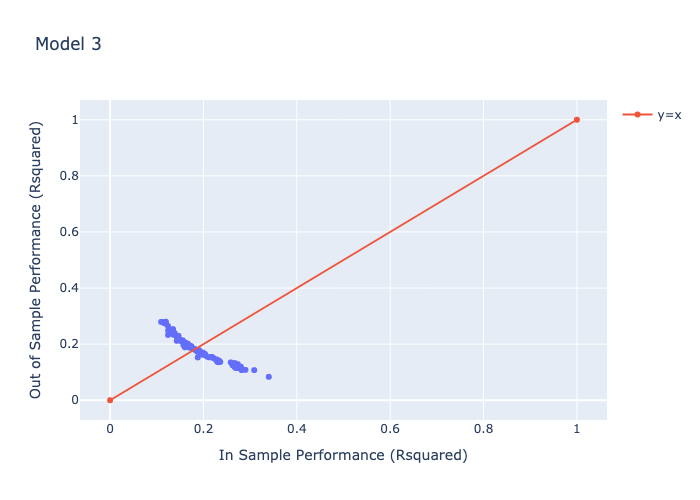

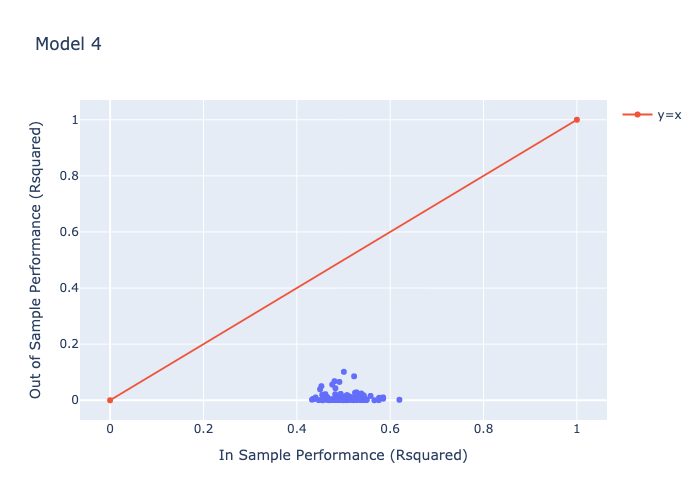

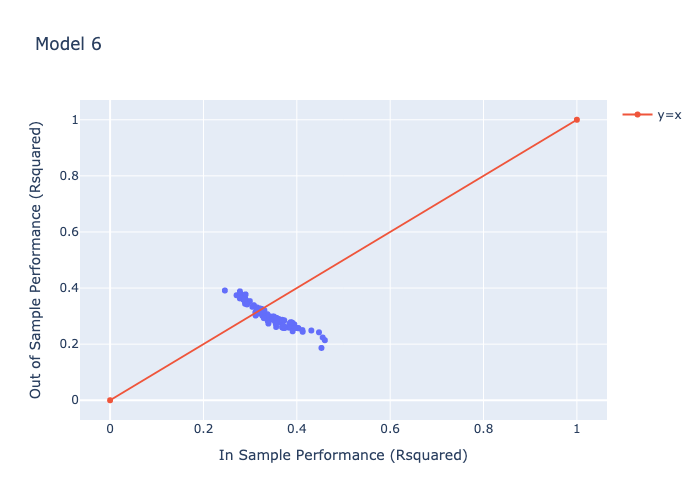

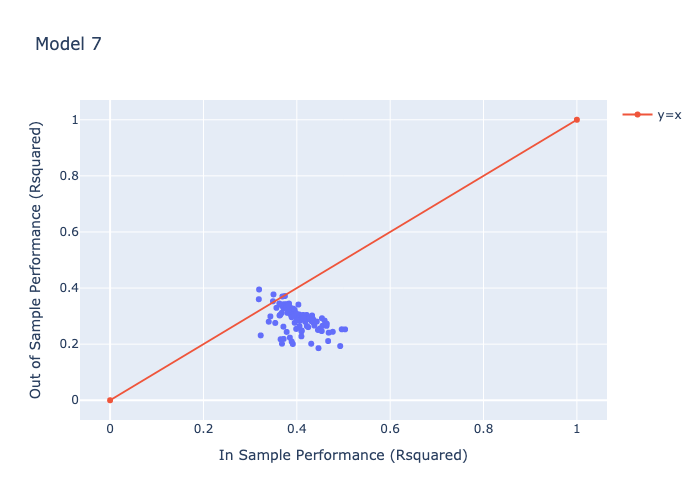

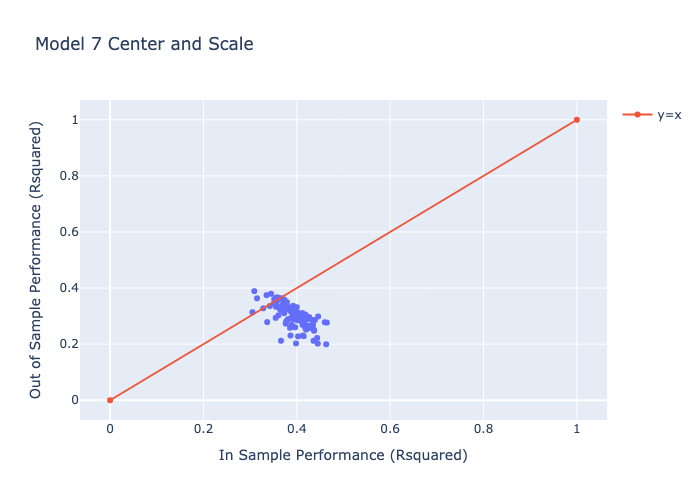

In [55]:
import plotly.express as px

linear_forms = {
    'Model 3' : 'HP ~ Attack + Defense',
    'Model 4' : model4_linear_form,
    # 'Model 5' : model5_linear_form, # For some reason for model 5, final_model_fit.predict(pokeaman_test) sometimes raises a KeyError
    'Model 6' : model6_linear_form,
    'Model 7' : model7_linear_form,
    'Model 7 Center and Scale' : model7_linear_form_CS
}

for name, linear_form in linear_forms.items():
    reps = 100
    in_sample_Rsquared = np.array([0.0]*reps)
    out_of_sample_Rsquared = np.array([0.0]*reps)
    for i in range(reps):
        pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=fifty_fifty_split_size)
        final_model_fit = smf.ols(formula=linear_form, data=pokeaman_train).fit()
        in_sample_Rsquared[i] = final_model_fit.rsquared
        out_of_sample_Rsquared[i] = np.corrcoef(pokeaman_test.HP, final_model_fit.predict(pokeaman_test))[0,1]**2
        
    df = pd.DataFrame({"In Sample Performance (Rsquared)": in_sample_Rsquared,
                    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared})
    fig = px.scatter(df, x="In Sample Performance (Rsquared)", 
                        y="Out of Sample Performance (Rsquared)", title=name)
    fig.add_trace(go.Scatter(x=[0,1], y=[0,1], name="y=x", line_shape='linear'))
    fig.show(renderer='png')

In every scatter plot, the points represents the in sample $R^2$ vs. out of sample $R^2$ for each model, if the points are close to the line $y=x$ then the model's in sample performace is similar to the out of sample performance, which suggests good generalization of the model, if the points are far below the line $y=x$ then the model is overfitting and lacks generalizability, if the points are far above the lin $y=x$ then this may be suggesting that the model is too simple that it captures the patterns in the test data by chance. The purpose of this demonstration is to visualize the in sample and out of sample performance of each model, by re-spliting, fitting, and comparing the $R^2$ values over and over again can help examine the consitancy of the performance of the model. This illustration is also useful to compare different models.


# 9.
In the first cell, a model is trained using the same linear form of model 7 but only using data of Generation 1, which has a higher in sample $R^2$ value compared to the original model 7, but it has a really low $R^2$ value when used to predict `HP` of future generations. In the second cell, another is training using the linear form of model 7 but using data from Generation 1 - 5, which has a similar in sample $R^2$ value compared to the original model 7, and it has a better $R^2$ value when used to predict `HP` of generation 6. In the third cell does the exact same thing as the first cell except it uses the linear form of model 6, which showed a higher in sample $R^2$ compared to the original model 6, but the $R^2$ value remains low when it is used to predict `HP` of future generations. The fourth cell does the exact same thing as the second cell except it uses the linear form of model 6, this model has a similar in sample $R^2$ value compared to the original model 6 as well as a similar $R^2$ value when used to predict `HP` of Generation 6.

This illustration shows that although model 7 performs better on the training data, but it is more complicated and lack interpretability, which make it more susceptible to overfiting and leads to generalizability concerns when used to predict future unseen data.


### ChatBot Summary
In our exchanges, we discussed multiple linear regression models on a Pokémon dataset, focusing on trade-offs between model complexity, interpretability, and generalizability. Starting with simpler models (model3 and model4), we then compared more complex models with high-order interactions (model7). We examined the benefits of simpler models like model6, which, despite slightly lower predictive performance, are more interpretable and may generalize better to future data. Using generational splits, we illustrated how complex models might overfit to specific data subsets, impacting their out-of-sample performance when predicting new generations. This highlighted the importance of parsimony, as simpler models often provide more consistent performance and greater interpretability, especially when sequential data is used to make predictions on future, unseen data.

Link: https://chatgpt.com/share/6733c7b9-d4f4-8011-855c-cec7090b187c

In [61]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432434 (original)
'Out of sample' R-squared: 0.35055389196356695 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363445532017 (gen1_predict_future)


In [62]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432434 (original)
'Out of sample' R-squared: 0.35055389196356695 (original)
'In sample' R-squared:     0.3904756578094537 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915311209818 (gen1to5_predict_future)


In [63]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310907 (original)
'Out of sample' R-squared: 0.2957246042708021 (original)
'In sample' R-squared:     0.44338805177272833 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276192 (gen1_predict_future)


In [64]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310907 (original)
'Out of sample' R-squared: 0.2957246042708021 (original)
'In sample' R-squared:     0.3351727982411479 (gen1to5_predict_future)
'Out of sample' R-squared: 0.2626269017879974 (gen1to5_predict_future)
